### Bias and vairance (vineeth's code)

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge


def f(X):
    # Define the true function
    return np.mean(X, axis=1)

def calculate_bias_variance(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Calculate the average prediction
    average_prediction = np.mean(model.predict(X_test))

    # Calculate the bias
    bias = np.mean((average_prediction - y_test)**2)

    # Calculate the variance
    variance = np.mean(np.var(model.predict(X_test), axis=0))

    return bias, variance

def main():
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = f(X)  # Apply the true function

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a constant model
    constant_model = DummyRegressor(strategy='mean')
    constant_bias, constant_variance = calculate_bias_variance(constant_model, X_train, y_train, X_test, y_test)
    constant_error = constant_bias**2 + constant_variance

    # Create a linear model
    linear_model = LinearRegression()
    linear_bias, linear_variance = calculate_bias_variance(linear_model, X_train, y_train, X_test, y_test)
    linear_error = linear_bias**2 + linear_variance

    # Create a regularized model
    lambda_reg = 0.1
    regularized_model = Ridge(alpha=lambda_reg)
    regularized_bias, regularized_variance = calculate_bias_variance(regularized_model, X_train, y_train, X_test, y_test)
    regularized_error = regularized_bias**2 + regularized_variance


    print(f"Constant model - Bias squared: {constant_bias**2}, Variance: {constant_variance}, Total error: {constant_error}")
    print(f"Linear model - Bias squared: {linear_bias**2}, Variance: {linear_variance}, Total error: {linear_error}")
    print(f"Regularized model - Bias squared: {regularized_bias**2}, Variance: {regularized_variance}, Total error: {regularized_error}")


main()

Constant model - Bias squared: 0.4469833029447595, Variance: 1.7749370367472766e-30, Total error: 0.4469833029447595
Linear model - Bias squared: 0.43462887519290133, Variance: 0.659263888888889, Total error: 1.0938927640817904
Regularized model - Bias squared: 0.4346288900667452, Variance: 0.658682755092493, Total error: 1.0933116451592382


### bias and variance my code 

Bias-Variance Decomposition:
Constant (Dummy):
	Bias²: 0.5187
	Variance: 0.0012
	MSE: 0.5200

Linear Regression:
	Bias²: 0.4347
	Variance: 0.0081
	MSE: 0.4428

Ridge Regression:
	Bias²: 0.5212
	Variance: 0.0072
	MSE: 0.5284



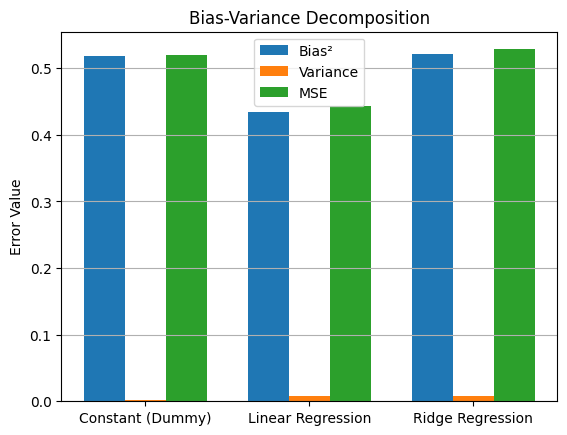

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

def calculate_bias_variance(X, y, model, num_runs=50, test_size=0.2, random_state=None):
    predictions = []

    for i in range(num_runs):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        predictions.append(preds)

    predictions = np.array(predictions)
    avg_pred = np.mean(predictions, axis=0)

    # Bias squared: how far avg prediction is from true values
    bias_squared = np.mean((y_test - avg_pred) ** 2)

    # Variance: how much predictions vary across runs
    variance = np.mean(np.var(predictions, axis=0))

    # Total error (Mean Squared Error)
    mse = bias_squared + variance

    return bias_squared, variance, mse

def main():
    # 👇 Replace this part with your professor's dataset        
    
    #----------------------------------------------------------------------------

    # df = pd.read_csv('your_dataset.csv')  # 👈 your dataset filename 
    
    #----------------------------------------------------------------------------

    #X = df[["feature1", "feature2"]].values
    #y = df["target"].values

    #----------------------------------------------------------------------------
    
    
    df = pd.DataFrame({                
        "x": np.linspace(0, 10, 100),
        "y": np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.3, 100)
    })

    X = df[["x"]].values
    y = df["y"].values

    #----------------------------------------------------------------------------

    # Models to evaluate
    models = {
        "Constant (Dummy)": DummyRegressor(strategy='mean'),
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=0.1)
    }

    results = {}

    for name, model in models.items():
        bias2, var, mse = calculate_bias_variance(X, y, model, num_runs=100)
        results[name] = (bias2, var, mse)

    # 📊 Print summarized results
    print("Bias-Variance Decomposition:")
    for model, (bias2, var, mse) in results.items():
        print(f"{model}:\n\tBias²: {bias2:.4f}\n\tVariance: {var:.4f}\n\tMSE: {mse:.4f}\n")

    # Visualizing results
    labels = list(results.keys())
    biases = [results[label][0] for label in labels]
    variances = [results[label][1] for label in labels]
    mse_values = [results[label][2] for label in labels]

    x = np.arange(len(labels))
    width = 0.25

    plt.bar(x - width, biases, width, label='Bias²')
    plt.bar(x, variances, width, label='Variance')
    plt.bar(x + width, mse_values, width, label='MSE')

    plt.xticks(x, labels)
    plt.ylabel("Error Value")
    plt.title("Bias-Variance Decomposition")
    plt.legend()
    plt.grid(axis='y')
    plt.show()

if __name__ == "__main__":
    main()

### Average value 

In [2]:
g_values_at_0 = [-1.52, -2.5, -1.51, -2.02]

average_g_at_0 = sum(g_values_at_0) / len(g_values_at_0)

print(f"Average value of g(x) at x=0: {average_g_at_0:.2f}")

Average value of g(x) at x=0: -1.89
